<a href="https://colab.research.google.com/github/Barasinghaa/Deep_learning/blob/main/Transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
IMAGE_SHAPE = (224, 224)

classifier=tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))   #This means(224,224,3)
])

Make predictions using ready made model (without any training)

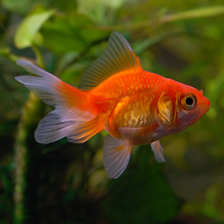

In [ ]:
gold_fish=Image.open("goldfish.jpg").resize(IMAGE_SHAPE)
gold_fish

In [ ]:
gold_fish=np.array(gold_fish)/255
gold_fish.shape

(224, 224, 3)

In [ ]:
gold_fish[np.newaxis, ...].shape

(1, 224, 224, 3)

In [ ]:
result=classifier.predict(gold_fish[np.newaxis, ...])

1/1 [==============================] - 9s 9s/step


In [ ]:
result.shape

(1, 1001)

In [ ]:
predict_label_index=np.argmax(result)
predict_label_index

2

In [ ]:
with open("ImageNetLabels.txt") as f:
  image_label=f.read().splitlines()
image_label[predict_label_index]

'goldfish'

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/daisy/3463313493_9497aa47e5_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/2581171297_b0a249b92b_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/3758221664_b19116d61f.jpg'),
 PosixPath('datasets/flower_photos/daisy/14221848160_7f0a37c395.jpg'),
 PosixPath('datasets/flower_photos/daisy/2346726545_2ebce2b2a6.jpg')]

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [ ]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/22385375599_1faf334f5d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/13979889721_42a59ca9fa_m.jpg'),
 PosixPath('datasets/flower_photos/roses/2677417735_a697052d2d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3667366832_7a8017c528_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15712574834_2f121c7cf9_m.jpg')]

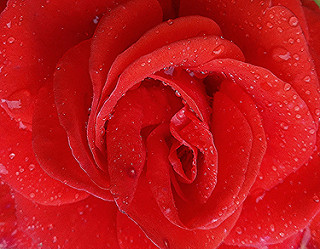

In [ ]:
Image.open(str(roses[0]))

In [ ]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:
img=cv2.imread(str(flowers_images_dict["roses"][0]))

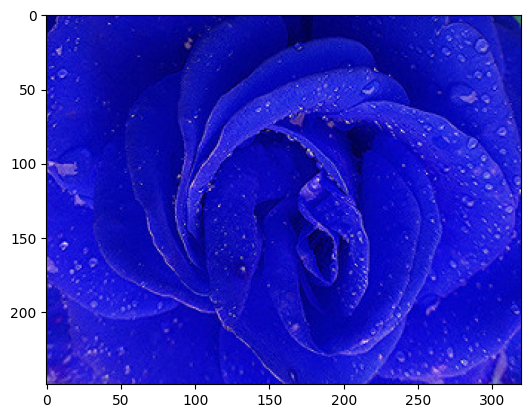

In [ ]:
plt.imshow(img)

In [ ]:
cv2.resize(img,IMAGE_SHAPE).shape

(224, 224, 3)

In [ ]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [ ]:
X=np.array(X)
y=np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [ ]:
X_train.shape

(2752, 224, 224, 3)

In [ ]:
y_train.shape

(2752,)

In [ ]:
X_test.shape

(918, 224, 224, 3)

In [ ]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

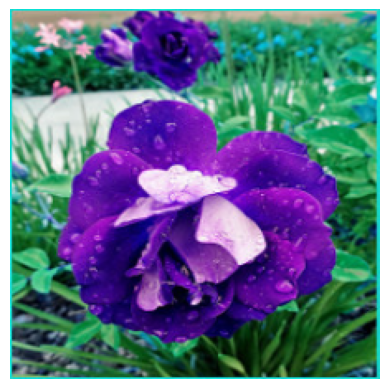

In [ ]:
plt.axis("off")
plt.imshow(X[1])

In [ ]:
predicted=classifier.predict(np.array([X[1],X[1],X[2]]))

1/1 [==============================] - 1s 915ms/step


In [ ]:
predict=np.argmax(predicted, axis=1)
predict

array([722, 722, 612])

In [ ]:
image_label[722]

'pillow'

In [ ]:
image_label[612]

'jigsaw puzzle'

In [ ]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [ ]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 9s 41ms/step - loss: 0.8554 - acc: 0.6813
Epoch 2/5
86/86 [==============================] - 3s 40ms/step - loss: 0.4336 - acc: 0.8467
Epoch 3/5
86/86 [==============================] - 3s 40ms/step - loss: 0.3436 - acc: 0.8815
Epoch 4/5
86/86 [==============================] - 4s 42ms/step - loss: 0.2859 - acc: 0.9077
Epoch 5/5
86/86 [==============================] - 3s 39ms/step - loss: 0.2497 - acc: 0.9215


In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 2s 42ms/step - loss: 0.3399 - acc: 0.8845


[0.3399452567100525, 0.8845316171646118]

In [ ]:
ans=model.predict(X_test_scaled)
ans=np.argmax(ans,axis=1)

29/29 [==============================] - 2s 38ms/step


In [ ]:
ans

array([1, 0, 2, 4, 2, 3, 0, 4, 3, 4, 1, 3, 2, 3, 4, 2, 1, 1, 0, 2, 2, 2,
       1, 2, 3, 0, 2, 4, 4, 0, 4, 2, 2, 4, 1, 1, 2, 2, 4, 1, 4, 0, 0, 4,
       2, 2, 3, 3, 2, 1, 0, 0, 2, 4, 1, 2, 0, 4, 4, 4, 0, 2, 4, 4, 3, 4,
       2, 0, 4, 4, 2, 1, 1, 0, 1, 0, 4, 1, 2, 0, 4, 2, 3, 1, 1, 4, 2, 3,
       0, 2, 0, 2, 2, 1, 3, 3, 1, 0, 1, 3, 2, 2, 4, 0, 4, 2, 0, 1, 0, 0,
       1, 0, 3, 3, 4, 3, 3, 0, 1, 4, 0, 1, 0, 4, 1, 2, 2, 0, 4, 2, 3, 0,
       0, 1, 0, 1, 3, 4, 3, 3, 3, 4, 0, 0, 2, 1, 1, 3, 2, 3, 4, 2, 0, 2,
       0, 3, 4, 2, 2, 0, 3, 0, 1, 4, 0, 2, 0, 1, 4, 0, 4, 0, 0, 3, 0, 4,
       3, 1, 4, 3, 2, 2, 4, 1, 1, 4, 2, 2, 2, 2, 3, 3, 2, 1, 4, 0, 2, 4,
       3, 2, 4, 2, 2, 0, 4, 0, 2, 2, 4, 0, 0, 3, 1, 3, 0, 1, 0, 0, 2, 4,
       0, 0, 2, 1, 1, 2, 1, 2, 3, 3, 0, 1, 4, 3, 2, 2, 1, 3, 3, 4, 4, 4,
       3, 3, 2, 0, 0, 0, 4, 3, 4, 0, 0, 2, 0, 3, 0, 3, 0, 2, 2, 1, 3, 4,
       2, 0, 2, 1, 3, 0, 4, 2, 4, 1, 4, 4, 0, 1, 2, 0, 0, 0, 3, 4, 1, 4,
       4, 2, 2, 1, 2, 1, 2, 4, 2, 1, 0, 4, 0, 1, 4,

In [ ]:
from pandas.core.api import unique
unique(ans)

array([1, 0, 2, 4, 3])

In [ ]:
y_test

array([1, 0, 2, 4, 2, 3, 0, 4, 3, 4, 1, 3, 2, 3, 4, 2, 1, 1, 0, 2, 2, 2,
       1, 2, 3, 0, 2, 4, 4, 0, 4, 2, 2, 3, 1, 1, 2, 2, 4, 1, 4, 4, 4, 4,
       2, 3, 3, 3, 2, 1, 0, 0, 2, 4, 1, 2, 0, 3, 4, 4, 0, 2, 4, 4, 2, 3,
       2, 0, 4, 4, 2, 2, 2, 0, 1, 0, 4, 1, 2, 0, 4, 2, 3, 1, 1, 4, 2, 3,
       0, 2, 0, 2, 2, 4, 3, 3, 1, 0, 1, 3, 2, 2, 4, 0, 4, 2, 0, 1, 0, 0,
       1, 0, 3, 3, 4, 3, 0, 0, 1, 0, 0, 1, 0, 4, 1, 2, 2, 0, 4, 2, 3, 0,
       4, 1, 0, 1, 3, 4, 3, 3, 3, 0, 4, 0, 2, 1, 0, 3, 2, 2, 4, 2, 0, 2,
       0, 1, 4, 2, 2, 0, 3, 0, 1, 4, 0, 3, 0, 1, 4, 0, 4, 4, 0, 0, 0, 4,
       3, 1, 4, 3, 2, 2, 4, 1, 1, 4, 2, 2, 2, 2, 4, 3, 2, 1, 4, 4, 2, 4,
       3, 2, 4, 2, 2, 4, 4, 0, 2, 2, 4, 0, 3, 3, 2, 3, 0, 1, 0, 0, 0, 4,
       0, 2, 2, 4, 1, 2, 1, 2, 3, 3, 0, 1, 0, 3, 2, 2, 1, 3, 3, 4, 4, 4,
       2, 3, 2, 0, 0, 0, 4, 3, 4, 0, 0, 2, 0, 3, 0, 1, 0, 2, 2, 1, 3, 4,
       1, 0, 2, 1, 3, 0, 4, 2, 4, 1, 4, 0, 0, 1, 2, 0, 0, 3, 3, 4, 1, 4,
       4, 2, 2, 1, 2, 1, 2, 4, 2, 1, 4, 4, 0, 1, 4,